In [5]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [5]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [7]:
#Fetch Images count from Fodlers
count = 0 
dirs = os.listdir("C:/Users/sooda/OneDrive/Desktop/Flower Images")
for dir in dirs:
    files = list(os.listdir("C:/Users/sooda/OneDrive/Desktop/Flower Images/"+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

daisy Folder has 501 Images
dandelion Folder has 646 Images
rose Folder has 497 Images
sunflower Folder has 495 Images
tulip Folder has 607 Images
Images Folder has 2746 Images


In [10]:
#Load Images into Arrays as Dataset
base_dir = "C:/Users/sooda/OneDrive/Desktop/Flower Images"
img_size = 180
batch = 32

In [12]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 2746 files belonging to 5 classes.
Using 2197 files for training.
Found 2746 files belonging to 5 classes.
Using 549 files for validation.


In [14]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [16]:
import matplotlib.pyplot as plt

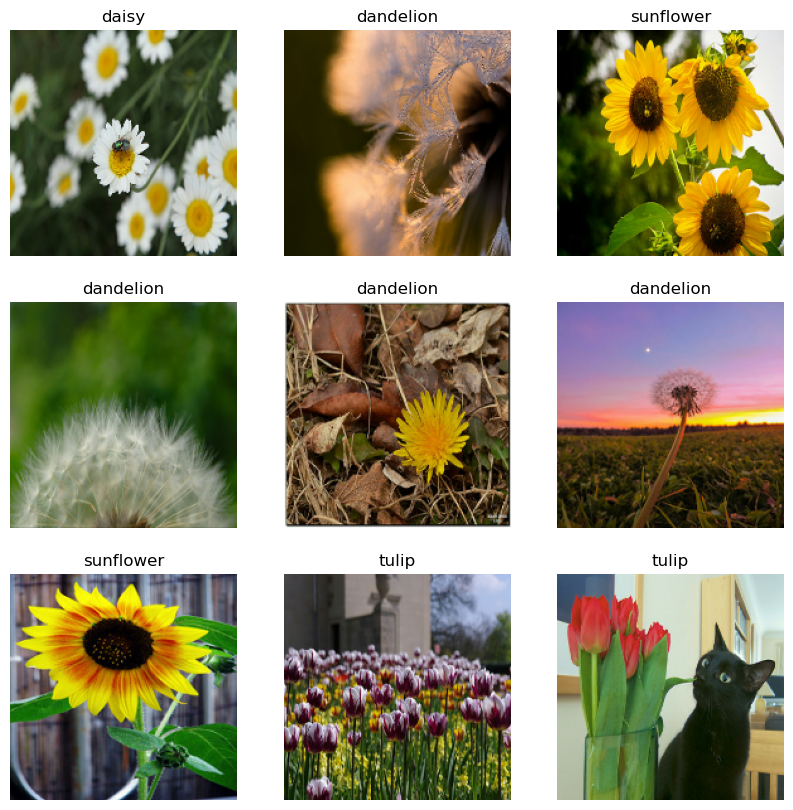

In [18]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [24]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [26]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\sooda\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


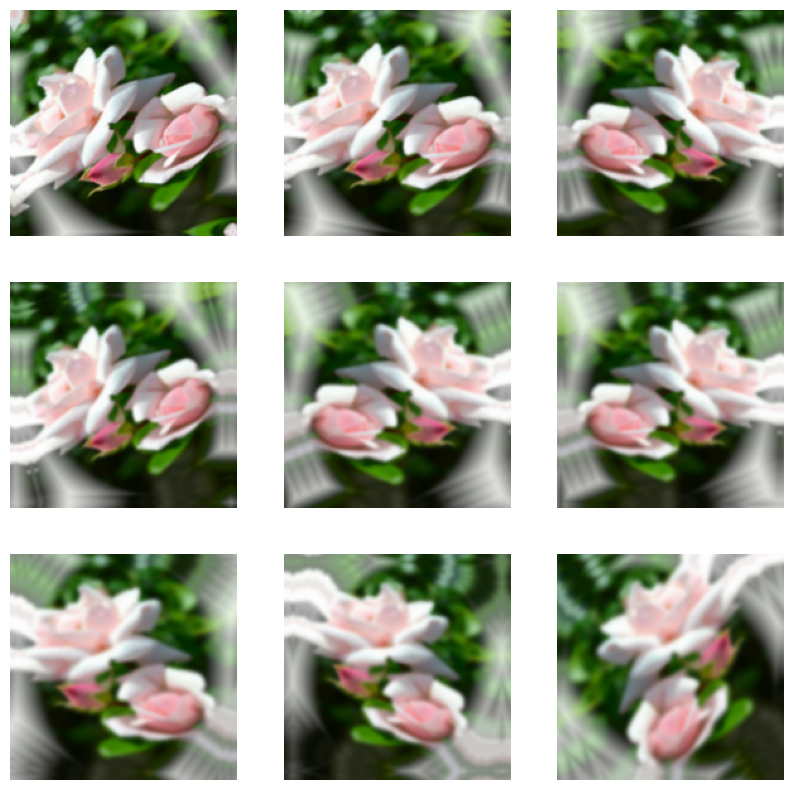

In [28]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [30]:
#Model Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - accuracy: 0.3721 - loss: 1.4910 - val_accuracy: 0.5100 - val_loss: 1.1156
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 235ms/step - accuracy: 0.5535 - loss: 1.0913 - val_accuracy: 0.5683 - val_loss: 1.0270
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - accuracy: 0.6175 - loss: 0.9913 - val_accuracy: 0.6120 - val_loss: 0.9471
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - accuracy: 0.6707 - loss: 0.8694 - val_accuracy: 0.6102 - val_loss: 0.9628
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.6758 - loss: 0.8284 - val_accuracy: 0.6630 - val_loss: 0.8613
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - accuracy: 0.7088 - loss: 0.7522 - val_accuracy: 0.6576 - val_loss: 0.8931
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.7135 - loss: 0.7209 - val_accuracy: 0.6831 - val_loss: 0.7921
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 216ms/step - accuracy: 0.7489 - loss: 0.6506 - val_accu

In [38]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [40]:
classify_images('C:/Users/sooda/OneDrive/Desktop/Flower Images/sunflower/4755705724_976621a1e7.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


'The Image belongs to sunflower with a score of 88.48397135734558'

In [42]:
model.save("flower_classification_model.keras")

In [44]:
import shutil
source="flower_classification_model.keras"
destination="C:/Users/sooda/PycharmProjects/Flower_Classification_usingCNN"
shutil.move(source, destination)
print("Model successfully moved")

Model successfully moved
